# K-Means Clustering

Creating clusters of customer data to predict customer behavior and provide a better experience based on the predicted clustering behavior of customer.

## Initial Setup

### Import the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Stylistics

In [2]:
%matplotlib inline 
pd.set_option("display.max_row", 500)
pd.set_option("display.max_column", 500)
pd.set_option("display.width", 1000)
plt.style.use("dark_background")

### Import the Dataset

In [3]:
data = pd.read_csv("../Datasets/Wholesale customers data.csv")

In [4]:
data.shape

(440, 8)

We have successfully loaded the file into a DataFrame.

### Exploring the Dataset

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Some of the observations that we can get here is:
1. We have 440 Observations from 0 - 439
2. We have a total of 8 columns

## Data Cleaning

In [7]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Here we used the isnull() method that returns a boolean value (True -> Null, False -> Is Not Null). Since True is also a value of 1 in python, summing it all up will result into a number of null values.

> Here in our dataset, we have no null values

In [8]:
outliers = {}
columns = data.columns


# Create a Dictionary of Key(Column) and Value([Num of Null, Remaining Values])
for column in columns:
    current_col = data[column]
    mean_col = current_col.mean()
    std_col = current_col.std()
    
    min_ = mean_col - (3 * std_col)
    max_ = mean_col + (3 * std_col) 
    
    count = 0
    
    for value in current_col:
        if value < min_ or value > max_:
            count += 1
            
        outliers[column] = [count, data.shape[0] - count]

In [9]:
outliers

{'Channel': [0, 440],
 'Region': [0, 440],
 'Fresh': [7, 433],
 'Milk': [9, 431],
 'Grocery': [7, 433],
 'Frozen': [6, 434],
 'Detergents_Paper': [10, 430],
 'Delicassen': [4, 436]}

Here we have displayed the number of outliers in a column and the remaining values if we removed the outliers.
Let's visualize the distribution of our values in the `Fresh` columns to see if removing the outliers will greatly impact our dataset.

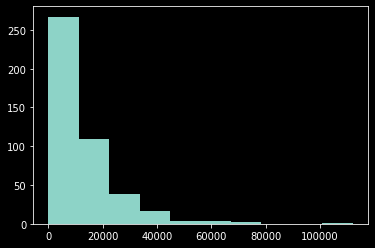

In [10]:
_ = plt.hist(data["Fresh"])

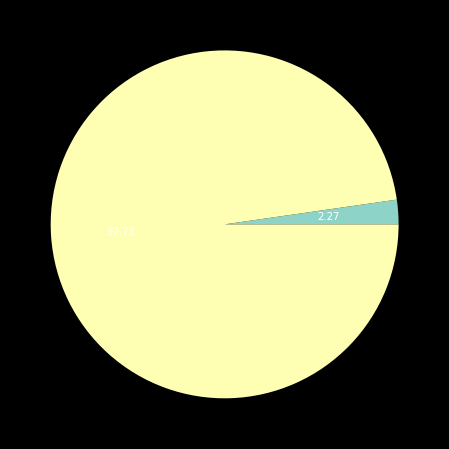

In [11]:
plt.figure(figsize=(8, 8))
_ = plt.pie(outliers["Detergents_Paper"], autopct="%.2f")

In [12]:
data_standardized = (data - data.mean())/data.std()
data_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


## K-Means Model

In [13]:
from sklearn.cluster import KMeans

In [14]:
ideal_k = []

for i in range(1, 21):
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(data)
    
    ideal_k.append([i, est_kmeans.inertia_])

In [15]:
ideal_k = np.array(ideal_k)

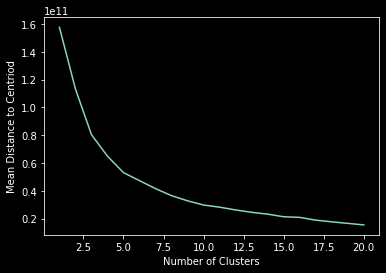

In [16]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.xlabel("Number of Clusters")
_ = plt.ylabel("Mean Distance to Centriod")

In [17]:
est_kmeans = KMeans(n_clusters=6, random_state=0).fit(data_standardized)

In [18]:
pred_kmeans = est_kmeans.predict(data_standardized)

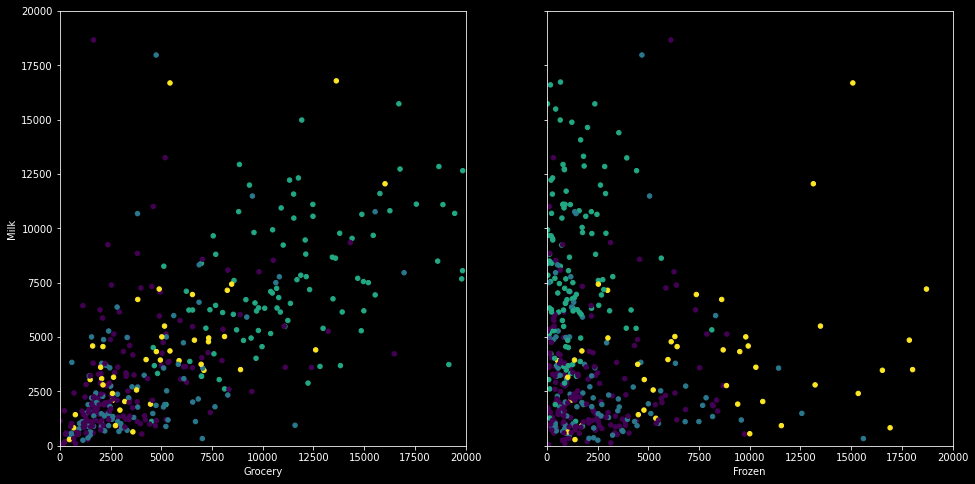

In [19]:
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8)) # Generate Two Subplots

# First Subplot
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Frozen')
plt.subplot(1, 2, 1)

# Second Subplot
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
_ = plt.ylabel('Milk')